In [88]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [89]:
results_dir = '/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/tmp_dir/exp5'
results_path = os.path.join(results_dir, "5_1.csv")
csv_data = pd.read_csv(results_path)
csv_data.head()

,hardware,case_name,R,O,I,B,model,process_time,sucess_run
0,ssd,case 1,"(3900, 3000, 3500)","(325, 250, 250)","(390, 300, 350)","(390, 300, 350)",keep,591.5964,True
1,ssd,case 1,"(3900, 3000, 3500)","(650, 500, 700)","(390, 300, 350)","(780, 600, 700)",keep,647.8091,True
2,ssd,case 1,"(3900, 3000, 3500)","(650, 500, 500)","(780, 600, 700)","(780, 600, 700)",keep,716.5244,True
3,ssd,case 1,"(3900, 3000, 3500)","(390, 300, 350)","(650, 375, 500)","(650, 375, 500)",keep,543.6023,True
4,ssd,case 1,"(3900, 3000, 3500)","(300, 250, 250)","(195, 150, 175)","(390, 300, 350)",keep,758.7712,True


In [90]:
if not (csv_data['sucess_run'] == True).all():
    print("WARNING - At least one run has failed (bad results):")
    failures = csv_data.loc[csv_data['sucess_run'] != 'True']
    print(failures)
    csv_data2 = csv_data.loc[csv_data['sucess_run'] == 'True'].drop(columns=["sucess_run"])
csv_data2.head()

WARNING - At least one run has failed (bad results):
   hardware case_name                   R                O                I  \
17      ssd    case 1  (3900, 3000, 3500)  (390, 300, 350)  (650, 375, 500)   

                  B     model  process_time sucess_run  
17  (650, 375, 500)  vanilla1           0.0       None  


,hardware,case_name,R,O,I,B,model,process_time
0,ssd,case 1,"(3900, 3000, 3500)","(325, 250, 250)","(390, 300, 350)","(390, 300, 350)",keep,591.5964
1,ssd,case 1,"(3900, 3000, 3500)","(650, 500, 700)","(390, 300, 350)","(780, 600, 700)",keep,647.8091
2,ssd,case 1,"(3900, 3000, 3500)","(650, 500, 500)","(780, 600, 700)","(780, 600, 700)",keep,716.5244
3,ssd,case 1,"(3900, 3000, 3500)","(390, 300, 350)","(650, 375, 500)","(650, 375, 500)",keep,543.6023
4,ssd,case 1,"(3900, 3000, 3500)","(300, 250, 250)","(195, 150, 175)","(390, 300, 350)",keep,758.7712


In [98]:
case_name = csv_data2.iloc[0]["case_name"]
R = csv_data2.iloc[0]["R"]
hardware = csv_data.iloc[0]["hardware"]
if not (csv_data2['case_name'] == case_name).all():
    raise ValueError()
elif not (csv_data2['hardware'] == hardware).all():
    raise ValueError()
elif not (csv_data2['R'] == R).all():
    raise ValueError()
else:
    csv_data3 = csv_data2.drop(columns=["case_name", "hardware", "R"])
    print(csv_data3.head())

                 O                I                B model  process_time
0  (325, 250, 250)  (390, 300, 350)  (390, 300, 350)  keep      591.5964
1  (650, 500, 700)  (390, 300, 350)  (780, 600, 700)  keep      647.8091
2  (650, 500, 500)  (780, 600, 700)  (780, 600, 700)  keep      716.5244
3  (390, 300, 350)  (650, 375, 500)  (650, 375, 500)  keep      543.6023
4  (300, 250, 250)  (195, 150, 175)  (390, 300, 350)  keep      758.7712


In [99]:
csv_data3["case"] = csv_data3["O"]+csv_data3["I"]+csv_data3["B"]
csv_data3 = csv_data3.drop(columns=["O","I","B"])
csv_data3

,model,process_time,case
0,keep,591.5964,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
1,keep,647.8091,"(650, 500, 700)(390, 300, 350)(780, 600, 700)"
2,keep,716.5244,"(650, 500, 500)(780, 600, 700)(780, 600, 700)"
3,keep,543.6023,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
4,keep,758.7712,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
5,vanillan,824.3937,"(650, 500, 500)(780, 600, 700)(780, 600, 700)"
6,vanillan,831.9997,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
7,vanillan,793.8126,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
8,vanillan,986.6692,"(650, 500, 700)(390, 300, 350)(780, 600, 700)"
9,vanillan,1303.6441,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"


# fill in missing values

In [100]:
case_names = csv_data3["case"].unique()
nb_cases = len(case_names)
labels = np.arange(nb_cases) + 1
labels = ["case " + str(i) for i in labels]
labels

['case 1', 'case 2', 'case 3', 'case 4', 'case 5']

In [101]:
models = csv_data3["model"].unique()
models

array(['keep', 'vanillan', 'python', 'vanilla1'], dtype=object)

In [102]:
# pour chaque case
# si pas model alors ajouter model avec processing time = 0
for case_name in labels_names:
    case_df = csv_data3[csv_data3["case"]==case_name]
    models_for_case = case_df["model"].unique()
    for model in models:
        if not model in models_for_case:
            print("missing model " + model + " for case " + case_name)
            csv_data3 = csv_data3.append({
                "model": model,
                "process_time": 0,
                "case": case_name
            }, ignore_index=True)

missing model python for case (300, 250, 250)(195, 150, 175)(390, 300, 350)
missing model python for case (390, 300, 350)(650, 375, 500)(650, 375, 500)
missing model vanilla1 for case (390, 300, 350)(650, 375, 500)(650, 375, 500)


# sort for neat graph

In [103]:
csv_data3 = csv_data3.sort_values(["case", "model"])
csv_data3

,model,process_time,case
4,keep,758.7712,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
17,python,0.0000,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
16,vanilla1,4756.9282,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
9,vanillan,1303.6441,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
0,keep,591.5964,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
11,python,5346.4189,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
14,vanilla1,4551.6310,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
6,vanillan,831.9997,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
3,keep,543.6023,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
18,python,0.0000,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"


# split per model for neat graph

In [104]:
csv_data_keep = csv_data3.loc[csv_data3["model"]=="keep"]
csv_data_v1 = csv_data3.loc[csv_data3["model"]=="vanilla1"]
csv_data_vn = csv_data3.loc[csv_data3["model"]=="vanillan"]
csv_data_python = csv_data3.loc[csv_data3["model"]=="python"]

In [105]:
csv_data_keep

,model,process_time,case
4,keep,758.7712,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
0,keep,591.5964,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
3,keep,543.6023,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
2,keep,716.5244,"(650, 500, 500)(780, 600, 700)(780, 600, 700)"
1,keep,647.8091,"(650, 500, 700)(390, 300, 350)(780, 600, 700)"


In [106]:
csv_data_v1

,model,process_time,case
16,vanilla1,4756.9282,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
14,vanilla1,4551.6310,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
19,vanilla1,0.0000,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
15,vanilla1,4548.8070,"(650, 500, 500)(780, 600, 700)(780, 600, 700)"
13,vanilla1,4520.0484,"(650, 500, 700)(390, 300, 350)(780, 600, 700)"


In [107]:
csv_data_vn

,model,process_time,case
9,vanillan,1303.6441,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
6,vanillan,831.9997,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
7,vanillan,793.8126,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
5,vanillan,824.3937,"(650, 500, 500)(780, 600, 700)(780, 600, 700)"
8,vanillan,986.6692,"(650, 500, 700)(390, 300, 350)(780, 600, 700)"


In [108]:
csv_data_python

,model,process_time,case
17,python,0.0000,"(300, 250, 250)(195, 150, 175)(390, 300, 350)"
11,python,5346.4189,"(325, 250, 250)(390, 300, 350)(390, 300, 350)"
18,python,0.0000,"(390, 300, 350)(650, 375, 500)(650, 375, 500)"
12,python,5085.4145,"(650, 500, 500)(780, 600, 700)(780, 600, 700)"
10,python,5071.9732,"(650, 500, 700)(390, 300, 350)(780, 600, 700)"


In [109]:
x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

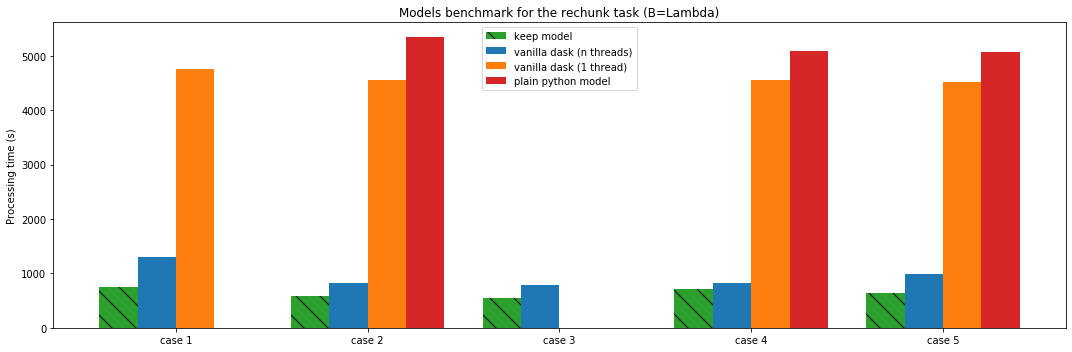

In [112]:
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - 3*width/2, csv_data_keep["process_time"], width, label='keep model', color=['tab:green'], hatch='\\')
rects2 = ax.bar(x - width/2, csv_data_vn["process_time"], width, label='vanilla dask (n threads)', color=['tab:blue'])
rects3 = ax.bar(x + width/2, csv_data_v1["process_time"], width, label='vanilla dask (1 thread)', color=['tab:orange'])
rects4 = ax.bar(x + 3*width/2, csv_data_python["process_time"], width, label='plain python model', color=['tab:red'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Processing time (s)')
ax.set_title('Models benchmark for the rechunk task (B=Lambda)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [113]:
for l, n in zip(labels, labels_names):
    print(l, n)

case 1 (300, 250, 250)(195, 150, 175)(390, 300, 350)
case 2 (325, 250, 250)(390, 300, 350)(390, 300, 350)
case 3 (390, 300, 350)(650, 375, 500)(650, 375, 500)
case 4 (650, 500, 500)(780, 600, 700)(780, 600, 700)
case 5 (650, 500, 700)(390, 300, 350)(780, 600, 700)
